In [13]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
pd.set_option('display.max_columns', 500)

str_path_file = "Data/car_prices.csv"
df_car_prices = pd.read_csv(str_path_file)
int_original_df_length = len(df_car_prices)
print(f"Dataframe is {len(df_car_prices)} rows, run at {datetime.datetime.now()}")

Dataframe is 558837 rows, run at 2024-03-25 21:36:41.667554


In [14]:
#df_car_prices = df_car_prices.drop('vin', axis=1)
#df_car_prices = df_car_prices.drop('interior', axis=1)
#df_car_prices = df_car_prices.drop('seller', axis=1)

# Nulls #

In [15]:
# Count missing values in each column
missing_values = df_car_prices.isnull().sum()
data_types = df_car_prices.dtypes
unique = df_car_prices.nunique()
non_null_counts = df_car_prices.count()

null_counts = df_car_prices.isnull().sum()
total_rows = len(df_car_prices)
null_percentage = (null_counts / total_rows) * 100

dataframe_metadata = pd.DataFrame({'Non-null Counts': non_null_counts, 'missing_values' :missing_values, 'null_percentage': null_percentage ,'Data Types': data_types, 'unique': unique})
print(datetime.datetime.now())
dataframe_metadata

2024-03-25 21:37:01.349173


,Non-null Counts,missing_values,null_percentage,Data Types,unique
year,558837,0,0.000000,int64,34
make,548536,10301,1.843292,object,96
model,548438,10399,1.860829,object,973
trim,548186,10651,1.905922,object,1963
body,545642,13195,2.361154,object,87
transmission,493485,65352,11.694287,object,4
vin,558833,4,0.000716,object,550297
state,558837,0,0.000000,object,64
condition,547017,11820,2.115107,float64,41
odometer,558743,94,0.016821,float64,172278


In [16]:
#Extract year from sales date
df_car_prices=df_car_prices.loc[df_car_prices['saledate'].str.len()>5]
df_car_prices['saleyear']=df_car_prices['saledate'].str[11:15].astype('int')

# Drop rows with invalid datetime values (NaT)
df_car_prices.dropna(subset=['saledate'], inplace=True)

# Calculate age as the difference between 'year' and 'saledate_year'
df_car_prices['age'] = df_car_prices['saleyear'] - df_car_prices['year']

print(f"Dataframe is {len(df_car_prices)} rows, run at {datetime.datetime.now()}.  Original length {int_original_df_length}.")

Dataframe is 558799 rows, run at 2024-03-25 21:37:02.094762.  Original length 558837.


In [17]:
df_car_prices=df_car_prices.loc[~df_car_prices['odometer'].isnull()]
print(f"Dataframe is {len(df_car_prices)} rows, run at {datetime.datetime.now()}.  Original length {int_original_df_length}.")

Dataframe is 558705 rows, run at 2024-03-25 21:37:02.268169.  Original length 558837.


In [18]:
#Clean body by making all characters lowercase
df_car_prices['body']=df_car_prices['body'].str.lower()
df_car_prices['make']=df_car_prices['make'].str.lower()
df_car_prices['model']=df_car_prices['model'].str.lower()
df_car_prices['trim']=df_car_prices['trim'].str.lower()
df_car_prices['state']=df_car_prices['state'].str.lower()
print(f"Dataframe is {len(df_car_prices)} rows, run at {datetime.datetime.now()}.  Original length {int_original_df_length}.")

Dataframe is 558705 rows, run at 2024-03-25 21:37:03.045714.  Original length 558837.


In [19]:
df_car_prices['pct_mmr']=df_car_prices['sellingprice']/df_car_prices['mmr']
print(f"Dataframe is {len(df_car_prices)} rows, run at {datetime.datetime.now()}.  Original length {int_original_df_length}.")
df_car_prices.head(2)

Dataframe is 558705 rows, run at 2024-03-25 21:37:03.066483.  Original length 558837.


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,age,pct_mmr
0,2015,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,-1,1.048780
1,2015,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,-1,1.033654


In [20]:
df_car_prices['age_when_sold'] = df_car_prices['saleyear'] - df_car_prices['year']
print(f"Dataframe is {len(df_car_prices)} rows, run at {datetime.datetime.now()}.  Original length {int_original_df_length}.")
df_car_prices.head(2)

Dataframe is 558705 rows, run at 2024-03-25 21:37:03.122369.  Original length 558837.


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,age,pct_mmr,age_when_sold
0,2015,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,-1,1.048780,-1
1,2015,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,-1,1.033654,-1


In [21]:
df_car_prices['Make-Model'] = df_car_prices['make'] + '-' + df_car_prices['model']
print(f"Dataframe is {len(df_car_prices)} rows, run at {datetime.datetime.now()}.  Original length {int_original_df_length}.")
df_car_prices.head(2)

Dataframe is 558705 rows, run at 2024-03-25 21:37:03.785898.  Original length 558837.


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,age,pct_mmr,age_when_sold,Make-Model
0,2015,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,-1,1.048780,-1,kia-sorento
1,2015,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,-1,1.033654,-1,kia-sorento


In [22]:

# Calculate age of car when sold
df_car_prices['age_when_sold'] = df_car_prices['saleyear'] - df_car_prices['year']

# Calculate selling price change for each car
df_car_prices['price_change'] = df_car_prices.groupby('Make-Model')['sellingprice'].diff()

# Calculate mean selling price change per year for each Make-Model
mean_price_change = df_car_prices.groupby(['Make-Model', 'age_when_sold'])['price_change'].mean().reset_index()

# Calculate percentage change
first_price_change = mean_price_change.groupby('Make-Model')['price_change'].transform('first')
mean_price_change['percentage_change'] = mean_price_change['price_change'] / first_price_change * 100

# Calculate Original Price
original_price = df_car_prices.groupby('Make-Model')['sellingprice'].min().reset_index()
original_price.rename(columns={'sellingprice': 'Original Price'}, inplace=True)

# Merge Original Price into mean_price_change DataFrame
mean_price_change = pd.merge(mean_price_change, original_price, on='Make-Model', how='left')

mean_price_change.head(25)

,Make-Model,age_when_sold,price_change,percentage_change,Original Price
0,acura-cl,11,4475.000000,100.000000,300.0
1,acura-cl,12,1129.411765,25.238252,300.0
2,acura-cl,13,369.444444,8.255742,300.0
3,acura-cl,14,-70.312500,-1.571229,300.0
4,acura-cl,15,-62.500000,-1.396648,300.0
5,acura-cl,16,-490.909091,-10.970036,300.0
6,acura-cl,17,-195.833333,-4.376164,300.0
7,acura-cl,18,-952.777778,-21.291124,300.0
8,acura-el,10,2100.000000,100.000000,2500.0
9,acura-ilx,0,759.090909,100.000000,8750.0


In [23]:
df_clean_car_prices = df_car_prices

# Model Depreciation #

### Import the data, dependencies, conver saledate into saleyear, and view data ###

In [24]:
df_clean_car_prices_2_11 = df_clean_car_prices[(df_clean_car_prices['age_when_sold'] > 1) ]
df_clean_car_prices_2_11 = df_clean_car_prices[(df_clean_car_prices['age_when_sold'] < 11) ]
print(f"Dataframe import size {len(df_clean_car_prices_2_11)} rows, {datetime.datetime.now()}.")

Dataframe import size 499723 rows, 2024-03-25 21:37:07.185653.


### Group by 'Make-Model' and 'saleyear' and calculate 'meansellingprice' ###

In [25]:
df_age_when_sold_grouped = df_clean_car_prices_2_11.groupby(['Make-Model', 'model', 'make', 'age_when_sold'])['sellingprice'].mean().reset_index()
df_age_when_sold_grouped.rename(columns={'sellingprice': 'meansellingprice'}, inplace=True)
print(datetime.datetime.now())
print(f"The df_age_when_sold_grouped dataframe has {len(df_age_when_sold_grouped)} records.")

2024-03-25 21:37:08.511281
The df_age_when_sold_grouped dataframe has 3673 records.


In [26]:
# Calculate percentage change in mean selling price for each make-model
df_age_when_sold_grouped['Percent_change_meansellingprice'] = df_age_when_sold_grouped.groupby(['Make-Model'])['meansellingprice'].pct_change() * 100

# Remove NaN values resulting from the first row of each group
df_age_when_sold_grouped.dropna(subset=['Percent_change_meansellingprice'], inplace=True)

# Convert percentage change to floating-point number after stripping '%'
df_age_when_sold_grouped['Percent_change_meansellingprice_float'] = df_age_when_sold_grouped['Percent_change_meansellingprice'].replace('%', '', regex=True).astype(float)

# Format the percentage change column
df_age_when_sold_grouped['Percent_change_meansellingprice'] = df_age_when_sold_grouped['Percent_change_meansellingprice'].map(lambda x: f"{x:.2f}%")
print(datetime.datetime.now())
print(f"Dataframe import size {len(df_age_when_sold_grouped)} rows run at {datetime.datetime.now()}")

2024-03-25 21:37:08.802427
Dataframe import size 2960 rows run at 2024-03-25 21:37:08.802969


In [27]:
selected_models = ['f-150', 'taurus', 'titan', 'sentra', 'corolla', 'tacoma', 'c/k 2500 series','malibu']
df_age_when_sold_grouped= df_age_when_sold_grouped[df_age_when_sold_grouped['model'].isin(selected_models)]

truck_models = ['f-150', 'titan', 'tacoma', 'c/k 2500 series']
trucks = df_age_when_sold_grouped[df_age_when_sold_grouped['model'].isin(truck_models)]

car_models = ['taurus', 'sentra', 'corolla', 'malibu']
cars= df_age_when_sold_grouped[df_age_when_sold_grouped['model'].isin(car_models)]
print(datetime.datetime.now())

2024-03-25 21:37:09.234710


In [28]:
# Regression model for trucks
t_x_values=trucks['age_when_sold']
t_y_values=trucks['meansellingprice']

(t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr) = linregress(t_x_values,t_y_values)
t_regress_values = t_x_values * t_slope + t_intercept
print(datetime.datetime.now())

2024-03-25 21:37:10.205399


In [29]:
# Regression model for cars
c_x_values=cars['age_when_sold']
c_y_values=cars['meansellingprice']

(c_slope, c_intercept, c_rvalue, c_pvalue, c_stderr) = linregress(c_x_values,c_y_values)
c_regress_values = c_x_values * c_slope + c_intercept
print(datetime.datetime.now())

2024-03-25 21:37:10.535948


In [30]:
# Regression model for all vehicles
x_values=df_age_when_sold_grouped['age_when_sold']
y_values=df_age_when_sold_grouped['meansellingprice']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def dollar_format(x, pos):
    return '${:,.0f}'.format(x)
formatter = FuncFormatter(dollar_format)

C:\Users\sakur\anaconda3-9\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sakur\anaconda3-9\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Black line is for all cars, green is for trucks, and purple is for sedans
R-values for lines: All Vehicles - Black: -0.74 Cars - Purple: -0.94 Trucks - Green-0.97
Slopes for lines: All Vehicles - Black: -1710.16 Cars - Purple: -1359.72 Trucks - Green-2328.62


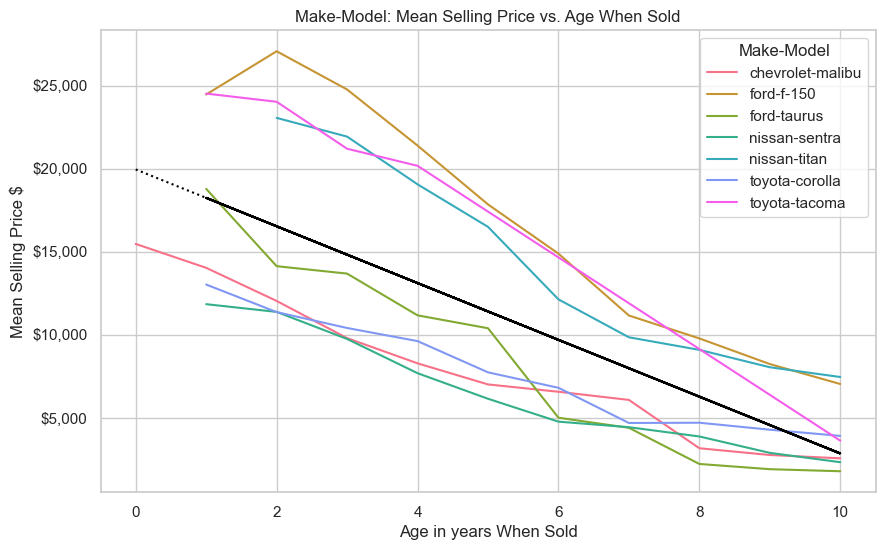

In [32]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped, x='age_when_sold', y='meansellingprice', hue='Make-Model', palette='husl')


# Set the title and labels
plt.title('Make-Model: Mean Selling Price vs. Age When Sold')
plt.xlabel('Age in years When Sold')
plt.ylabel('Mean Selling Price $')

plt.plot(x_values, regress_values, color='black', linestyle=':')
#plt.plot(t_x_values, t_regress_values, color='green', linestyle=':')
#plt.plot(c_x_values, c_regress_values, color='purple', linewidth=2, linestyle=':')

plt.gca().yaxis.set_major_formatter(formatter)

# Display the plot
plt.legend(title='Make-Model', loc='upper right')
print("Black line is for all cars, green is for trucks, and purple is for sedans")
print(f"R-values for lines: All Vehicles - Black: {round(rvalue,2)} Cars - Purple: {round(c_rvalue,2)} Trucks - Green{round(t_rvalue,2)}")
print(f"Slopes for lines: All Vehicles - Black: {round(slope,2)} Cars - Purple: {round(c_slope,2)} Trucks - Green{round(t_slope,2)}")
plt.show()

C:\Users\sakur\anaconda3-9\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sakur\anaconda3-9\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


2024-03-25 21:37:13.621732


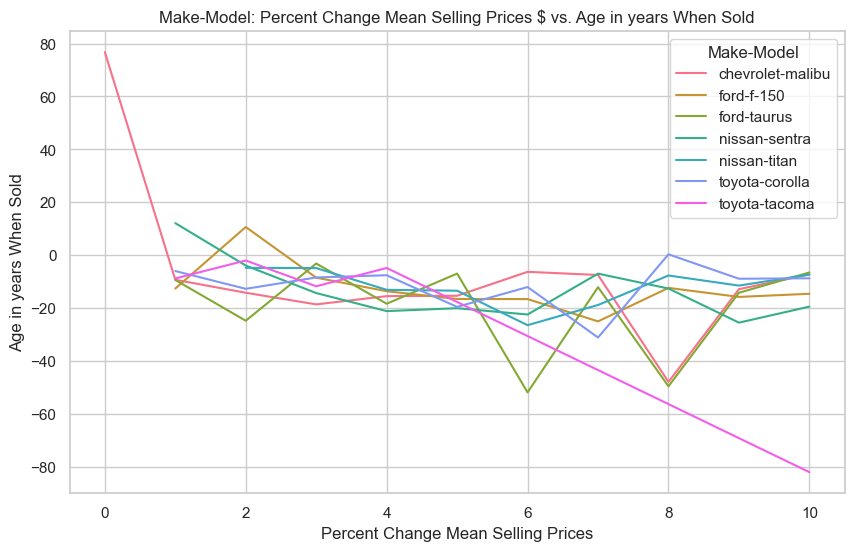

In [33]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped, x='age_when_sold', y='Percent_change_meansellingprice_float', hue='Make-Model', palette='husl')

# Set the title and labels
plt.title('Make-Model: Percent Change Mean Selling Prices $ vs. Age in years When Sold')
plt.xlabel('Percent Change Mean Selling Prices')
plt.ylabel('Age in years When Sold')

# Display the plot
plt.legend(title='Make-Model', loc='upper right')
print(datetime.datetime.now())
plt.show()

C:\Users\sakur\anaconda3-9\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sakur\anaconda3-9\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


2024-03-25 21:37:14.469337


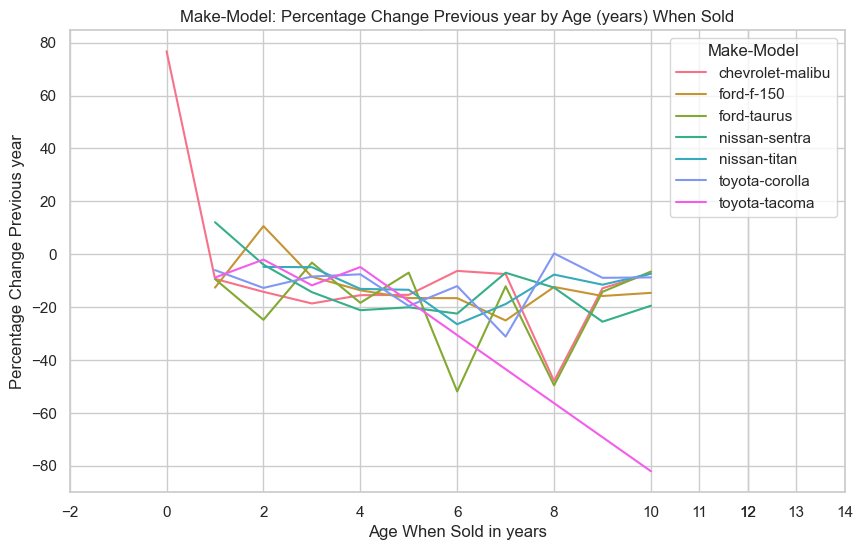

In [34]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped, x='age_when_sold', y='Percent_change_meansellingprice_float', hue='Make-Model', palette='husl')

# Set the title and labels
plt.title('Make-Model: Percentage Change Previous year by Age (years) When Sold')
plt.xlabel('Age When Sold in years')
plt.ylabel('Percentage Change Previous year')

# Display the plot
plt.legend(title='Make-Model', loc='upper right')
plt.xticks(list(plt.xticks()[0]) + [11, 12, 13, 14])
print(datetime.datetime.now())
plt.show()

C:\Users\sakur\anaconda3-9\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sakur\anaconda3-9\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


2024-03-25 21:37:25.943085


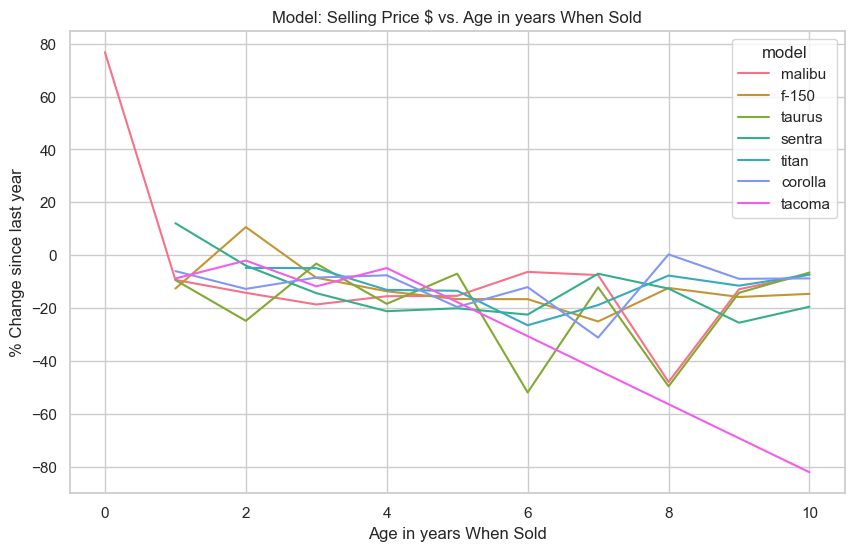

In [35]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped, x='age_when_sold', y='Percent_change_meansellingprice_float', hue='model', palette='husl')

# Set the title and labels
plt.title('Model: Selling Price $ vs. Age in years When Sold')
plt.xlabel('Age in years When Sold')
plt.ylabel('% Change since last year')

# Display the plot
plt.legend(title='model', loc='upper right')
print(datetime.datetime.now())
plt.show()

# Make Depreciation #

In [36]:
df_clean_car_prices = df_clean_car_prices[(df_clean_car_prices['age_when_sold'] > 1) ]
df_clean_car_prices = df_clean_car_prices[(df_clean_car_prices['age_when_sold'] < 11) ]
print(f"Dataframe import size {len(df_clean_car_prices)} rows, clean checksum is {int_clean_car_prices_checksum}, run at {datetime.datetime.now()}.  Difference is only cars between 1 and 10 years old are used, inclusive")

NameError: name 'int_clean_car_prices_checksum' is not defined

### age_when_sold_grouped_df ###

In [37]:
age_when_sold_grouped_df = df_clean_car_prices.groupby(['make', 'age_when_sold'])['sellingprice'].mean().reset_index()
age_when_sold_grouped_df.rename(columns={'sellingprice': 'meansellingprice'}, inplace=True)
print(datetime.datetime.now())
print(f"The age_when_sold_grouped_df dataframe has {len(age_when_sold_grouped_df)} records.")
age_when_sold_grouped_df.head()

2024-03-25 21:37:31.164657
The age_when_sold_grouped_df dataframe has 387 records.


,make,age_when_sold,meansellingprice
0,acura,2,21796.979167
1,acura,3,20473.992995
2,acura,4,20077.881041
3,acura,5,16573.373984
4,acura,6,13768.600000


In [38]:
# Assuming grouped_df is your DataFrame with columns 'make', 'age_when_sold', and 'sellingprice'

# Filter grouped_df for specific makes
selected_makes = ['ford', 'chevrolet', 'nissan', 'toyota']

df_age_when_sold_grouped_df_FCNT = age_when_sold_grouped_df[age_when_sold_grouped_df['make'].isin(selected_makes)]
df_age_when_sold_grouped_df_FCNT = df_age_when_sold_grouped_df_FCNT[df_age_when_sold_grouped_df_FCNT['age_when_sold'] > 1]

# Display the filtered DataFrame
print(datetime.datetime.now())
print(f"The df_age_when_sold_grouped_df_FCNT dataframe has {len(df_age_when_sold_grouped_df_FCNT)} records.")
df_age_when_sold_grouped_df_FCNT.head()

2024-03-25 21:37:31.921237
The df_age_when_sold_grouped_df_FCNT dataframe has 36 records.


,make,age_when_sold,meansellingprice
60,chevrolet,2,14197.340237
61,chevrolet,3,13086.515445
62,chevrolet,4,12571.617838
63,chevrolet,5,10936.743407
64,chevrolet,6,9373.161249


In [39]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def dollar_format(x, pos):
    return '${:,.0f}'.format(x)
formatter = FuncFormatter(dollar_format)

C:\Users\sakur\anaconda3-9\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sakur\anaconda3-9\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


The rvalue is -0.96; the slope is -1402.93.


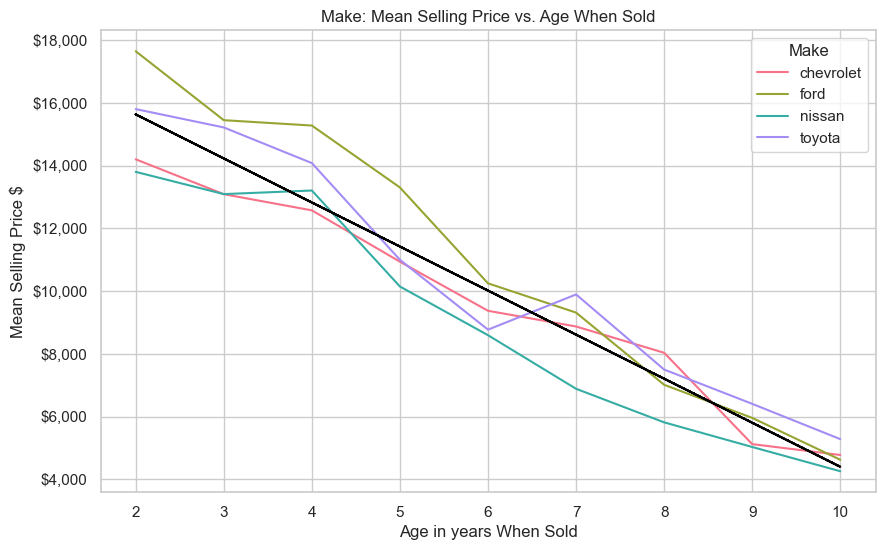

In [40]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped_df_FCNT, x='age_when_sold', y='meansellingprice', hue='make', palette='husl')

#Regression line
x_values=df_age_when_sold_grouped_df_FCNT['age_when_sold']
y_values=df_age_when_sold_grouped_df_FCNT['meansellingprice']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

# Set the title and labels
plt.title('Make: Mean Selling Price vs. Age When Sold')
plt.xlabel('Age in years When Sold')
plt.ylabel('Mean Selling Price $')

plt.gca().yaxis.set_major_formatter(formatter)

plt.plot(x_values, regress_values, color='black', linestyle=':')

# Display the plot
plt.legend(title='Make', loc='upper right')
print(f"The rvalue is {round(rvalue,2)}; the slope is {round(slope,2)}.")
plt.show()

In [41]:
# Create age ranges like '1_2'
age_when_sold_grouped_df['age_range'] =  (age_when_sold_grouped_df['age_when_sold'] - 1).astype(str)    + '_' +  age_when_sold_grouped_df['age_when_sold'].astype(str) 

# Calculate mean selling price for each make and age_range group
df_change_price_age_when_sold_grouped = age_when_sold_grouped_df.groupby(['make', 'age_range']).mean().reset_index()

# Calculate percentage change in mean selling price for each make
df_change_price_age_when_sold_grouped['Percent_change_meansellingprice'] = df_change_price_age_when_sold_grouped.groupby('make')['meansellingprice'].pct_change() * 100

# Remove NaN values resulting from the first row of each group
df_change_price_age_when_sold_grouped.dropna(subset=['Percent_change_meansellingprice'], inplace=True)

# Convert percentage change to floating-point number after stripping '%'
df_change_price_age_when_sold_grouped['Percent_change_meansellingprice_float'] = df_change_price_age_when_sold_grouped['Percent_change_meansellingprice'].replace('%', '', regex=True).astype(float)

# Format the percentage change column
df_change_price_age_when_sold_grouped['Percent_change_meansellingprice'] = df_change_price_age_when_sold_grouped['Percent_change_meansellingprice'].map(lambda x: f"{x:.2f}%")

In [42]:
selected_makes = ['ford', 'chevrolet', 'nissan', 'toyota']
df_change_price_age_when_sold_grouped_f_C_N_T = df_change_price_age_when_sold_grouped[df_change_price_age_when_sold_grouped['make'].isin(selected_makes)]

print(datetime.datetime.now())
print(f"The df_change_price_age_when_sold_grouped_f_C_N_T dataframe has {len(df_change_price_age_when_sold_grouped_f_C_N_T)} records.")

2024-03-25 21:37:38.418413
The df_change_price_age_when_sold_grouped_f_C_N_T dataframe has 32 records.


C:\Users\sakur\anaconda3-9\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sakur\anaconda3-9\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


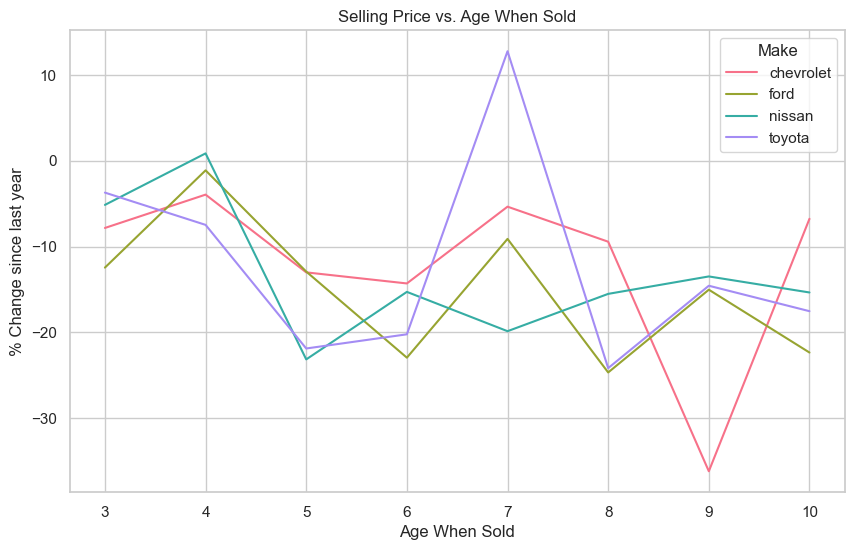

2024-03-25 21:37:40.484481


In [43]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_change_price_age_when_sold_grouped_f_C_N_T, x='age_when_sold', y='Percent_change_meansellingprice_float', hue='make', palette='husl')

# Set the title and labels
plt.title('Selling Price vs. Age When Sold')
plt.xlabel('Age When Sold')
plt.ylabel('% Change since last year')

# Display the plot
plt.legend(title='Make', loc='upper right')
plt.show()
print(datetime.datetime.now())

# Question 1 #

In [44]:
df_clean_car_prices['Make-Model'].nunique()

656

In [45]:
# car_prices_df['Make-Model'].value_counts().sort_index()

In [46]:
## Question 1: How do sales differ by vehicle type? ##
# Part 1: Which vehicle type is most popular(like sedans, SUVs, trucks, electric vehicles)

# filtering the DataFrame to include only data in 2015
vehicle_type = df_clean_car_prices[(df_clean_car_prices["saleyear"] == 2015)]

# use group by to sperate the data by vehicle type,then calculate the total price of each group
vehicle_type = df_clean_car_prices.groupby("Make-Model")["sellingprice"].sum()
vehicle_type

# The unique method shows every vehicle type in the car_prices data set
# unique = car_prices_df["body"].unique()
# unique 

Make-Model
acura-el          7100.0
acura-ilx      1695550.0
acura-mdx     22329500.0
acura-rdx      6393900.0
acura-rl        609950.0
                 ...    
volvo-xc60     4905150.0
volvo-xc70     1489800.0
volvo-xc90     5445325.0
vw-jetta         56800.0
vw-routan        80200.0
Name: sellingprice, Length: 656, dtype: float64

In [47]:
# most popular Make-Model
vehicle_type_max = vehicle_type.idxmax()
vehicle_type_max # Sedan

'ford-f-150'

In [48]:
# top 10 most popular vehicle type
print(vehicle_type.nlargest(10))

Make-Model
ford-f-150               208278759.0
nissan-altima            182005117.0
infiniti-g sedan         143312472.0
ford-escape              120608577.0
bmw-3 series             109216605.0
ford-fusion              108362790.0
ford-explorer             91722093.0
ford-edge                 89903380.0
toyota-camry              87269704.0
mercedes-benz-c-class     82425529.0
Name: sellingprice, dtype: float64


In [49]:
# least popular vehicle type
vehicle_type_min = vehicle_type.idxmin()
vehicle_type_min 

'chrysler-pt'

In [50]:
# top 10 least popular vehicle type
print(vehicle_type.nsmallest(10))

Make-Model
chrysler-pt             600.0
mitsubishi-diamante     650.0
chevrolet-uplandr       900.0
chevrolet-optra        1650.0
suzuki-swift           1800.0
smart-42c              2000.0
gmc-safari cargo       2100.0
hyundai tk-santa       2100.0
gmc-safari             2150.0
pontiac-pursuit        2400.0
Name: sellingprice, dtype: float64


In [51]:
# the most popular Make-Mode in each state

# Group by state and Make-Model, then count the occurrences
popularity_state = df_clean_car_prices.groupby(['state', 'Make-Model']).size().reset_index(name='counts')

# Sort within each state by count, descending
popularity_state = popularity_state.sort_values(['state', 'counts'], ascending=[True, False])
popularity_state

# drop duplicates keeping the first (most popular) entry for each state
most_popular_per_state = popularity_state.drop_duplicates(subset=['state'], keep='first')
most_popular_per_state

,state,Make-Model,counts
44,ab,ford-f-150,164
132,al,ford-explorer sport trac,2
202,az,chevrolet-impala,161
978,ca,nissan-altima,2160
1384,co,nissan-altima,231
1898,fl,nissan-altima,2983
2419,ga,nissan-altima,770
2636,hi,honda-civic,42
3087,il,nissan-altima,1405
3237,in,chevrolet-impala,129


In [52]:
# part 2: Average price per type, expensive and cheapest vehicle type 
MakeModel_mean = df_clean_car_prices.groupby("Make-Model")["sellingprice"].mean()
MakeModel_mean

# list them out from most expensive to cheapest (bar graph) 
MakeModel_mean_sorted = MakeModel_mean.sort_values(ascending=False)
MakeModel_mean_sorted

Make-Model
ferrari-458 italia          183000.000000
mercedes-benz-sls amg gt    156500.000000
rolls-royce-ghost           153488.235294
ferrari-california          131846.153846
mercedes-benz-sls amg       116016.666667
                                ...      
dodge-intrepid                 966.666667
chevrolet-uplandr              900.000000
chevrolet-optra                825.000000
mitsubishi-diamante            650.000000
chrysler-pt                    600.000000
Name: sellingprice, Length: 656, dtype: float64

In [53]:
# Print the first 10 most expensive vehicle types
print("Top 10 Most Expensive Make-Model:")
print(MakeModel_mean_sorted.head(10))

# Print a separator
print("\n" + "-"*50 + "\n")

# Print the 10 cheapest vehicle types
print("Top 10 Cheapest Make-Model:")
print(MakeModel_mean_sorted.tail(10))


Top 10 Most Expensive Make-Model:
Make-Model
ferrari-458 italia                       183000.000000
mercedes-benz-sls amg gt                 156500.000000
rolls-royce-ghost                        153488.235294
ferrari-california                       131846.153846
mercedes-benz-sls amg                    116016.666667
lamborghini-gallardo                     112625.000000
bentley-continental gtc speed            111000.000000
ferrari-f430                             109750.000000
bentley-continental flying spur speed    105750.000000
bentley-continental supersports          101000.000000
Name: sellingprice, dtype: float64

--------------------------------------------------

Top 10 Cheapest Make-Model:
Make-Model
chrysler-300m          1407.142857
chevrolet-cavalier     1352.173913
pontiac-pursuit        1200.000000
oldsmobile-alero       1175.000000
chrysler-concorde      1070.000000
dodge-intrepid          966.666667
chevrolet-uplandr       900.000000
chevrolet-optra         825.00000

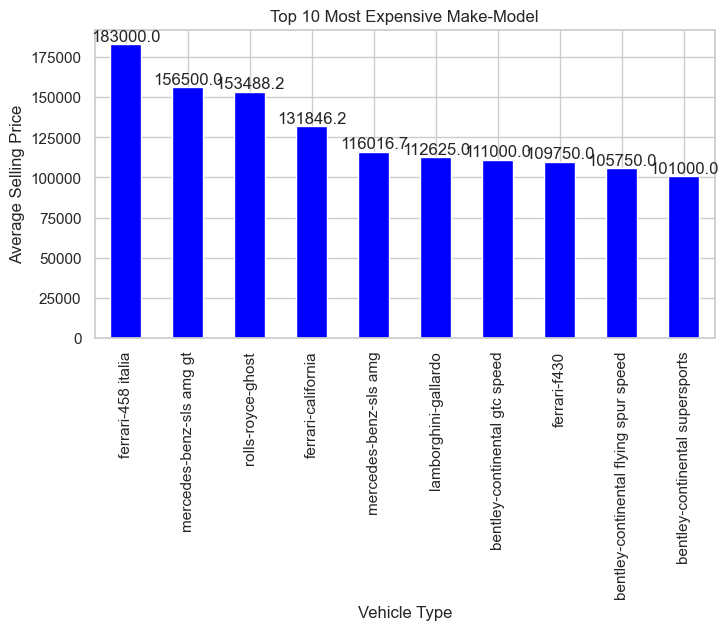

In [54]:
# visualization 
# Top 10 Most Expensive Make-Model
top_10_expensive = MakeModel_mean_sorted.head(10)
top_10_expensive.plot(kind='bar', figsize=(8, 4), color='blue')
plt.title('Top 10 Most Expensive Make-Model')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Selling Price')
# plt.xticks(rotation=60)

for index, value in enumerate(top_10_expensive):
    plt.text(index, value, f"{value:.1f}", ha='center', va='bottom')
    
plt.show()

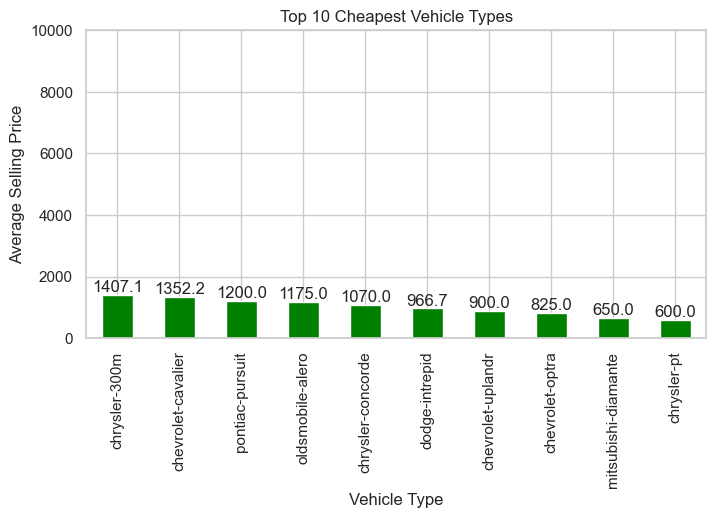

In [55]:
# Top 10 Cheapest Vehicle Types
top_10_cheapest = MakeModel_mean_sorted.tail(10)
top_10_cheapest.plot(kind='bar', figsize=(8, 4), color='green')
plt.title('Top 10 Cheapest Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Selling Price')
# plt.xticks(rotation=60)
plt.ylim(0, 10000)

for index, value in enumerate(top_10_cheapest):
    plt.text(index, value, f"{value:.1f}", ha='center', va='bottom')
    
plt.show()

In [56]:
car_prices=df_car_prices.loc[df_car_prices['saledate'].str.len()>5]
car_prices=df_car_prices.loc[~df_car_prices['odometer'].isnull()]

clean_df=car_prices.copy()
clean_df['saleyear']=clean_df['saledate'].str[11:15].astype('int')

In [58]:
# Create a DataFrame with columns: make, model, condition, odometer, mmr, sellingprice
car_value_df=car_prices[["make", "model", "condition","odometer","mmr", "sellingprice"]]

#drop row if make is null
car_value_no_null_df=car_value_df.dropna(subset=['make'], inplace=False)

#count the number of rows by make 
car_value_make_df=car_value_no_null_df.groupby("make").count()
Car_value_make_data_count=car_value_make_df.sort_values(by="model",ascending=False).head(30)

Car_value_make_data_count

,model,condition,odometer,mmr,sellingprice
make,,,,,
ford,93975,92445,93975,93975,93975
chevrolet,60571,59200,60571,60571,60571
nissan,54015,53186,54015,54015,54015
toyota,39958,39077,39958,39958,39958
dodge,30950,30305,30950,30950,30950
honda,27345,26493,27345,27345,27345
hyundai,21831,21490,21831,21831,21831
bmw,20704,20377,20790,20790,20790
kia,18080,17876,18080,18080,18080


In [65]:
##drop row if sellingprice is null
car_value_dropna_price_df=car_value_no_null_df.dropna(subset=['sellingprice'], inplace=False)


In [66]:
car_value_make_df = car_value_no_null_df.groupby("make").mean(numeric_only=True)

car_value_make_df.head(40).sort_values(by="sellingprice",ascending=True).head(10)


,condition,odometer,mmr,sellingprice
make,,,,
daewoo,18.000000,78270.666667,633.333333,400.000000
ford truck,1.333333,194084.666667,550.000000,483.333333
dot,19.000000,191734.000000,850.000000,500.000000
geo,5.894737,177356.736842,609.210526,528.947368
dodge tk,19.000000,246997.000000,625.000000,550.000000
isuzu,18.260638,140132.225490,1750.857843,1709.196078
chev truck,NaN,136490.000000,1925.000000,2000.000000
hyundai tk,NaN,131532.000000,1875.000000,2100.000000
ford tk,19.000000,108474.000000,3475.000000,2800.000000


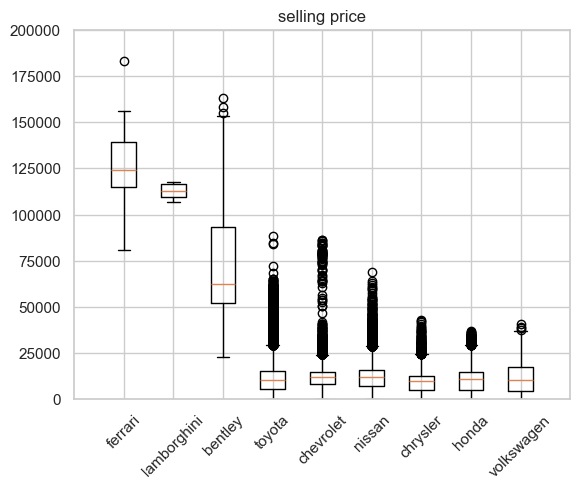

In [68]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

#put make which have over 10,000 rows into a list for loop
make_list=["ferrari","lamborghini","bentley", #Make with only Luxury line
           "chevrolet","nissan","toyota",  #　Make with wide range car from Luxury to economy,
           "volkswagen","honda","chrysler",  #Make with economy line
          ]

#create empty list to fill selling price data for plotting
selling_price_list=[]

for make in make_list:
    price_data=car_value_dropna_price_df[car_value_dropna_price_df['make'] == make]["sellingprice"]
    selling_price_list.append(price_data)
    
    quartiles = price_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = price_data[(price_data < lower_bound) | (price_data > upper_bound)]



# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(selling_price_list,labels=make_list)

# Sort the labels in descending order of average price
sorted_make_list = [make for _, make in sorted(zip([price.mean() for price in selling_price_list], make_list), reverse=True)]
plt.xticks(range(1, len(make_list) + 1), sorted_make_list, rotation=45)

plt.title("selling price")

plt.xlim(0, len(make_list) + 1)
plt.ylim(0,200000)
plt.savefig('sellingprice_boxplot.png',bbox_inches='tight')

plt.show()

In [69]:
#put make which have over 10,000 rows into a list 
make_list=["ford","chevrolet","nissan","toyota","dodge","honda","hyundai","bmw","kia","chrysler","mercedes-benz","jeep","infiniti","volkswagen","lexus","gmc"]

#empty list to append data of each make
selected_make = []

for make in make_list:

    #filter the dataframe to get data for the selected make
    selected_make_data=car_value_dropna_price_df[car_value_dropna_price_df["make"]==make]
    selected_make.append(selected_make_data)

#create new dataframe by merging each dataframe per make
selected_make_df = pd.concat(selected_make)

car_value_make_df = selected_make_df.groupby("make").mean(numeric_only=True)

car_value_make_df.head(40).sort_values(by="sellingprice",ascending=True).head(20)

,condition,odometer,mmr,sellingprice
make,,,,
volkswagen,29.385353,66907.357609,9518.595961,9368.491334
honda,29.274374,80725.527080,10967.611995,10906.579265
hyundai,32.136389,51270.239247,11224.625532,11003.269937
chrysler,25.501140,66336.007208,11316.509353,11069.164579
dodge,26.958951,72865.042682,11373.973344,11164.984459
nissan,31.987948,56314.204462,11859.874109,11731.967157
kia,33.666536,46029.439934,11945.855918,11807.285011
chevrolet,27.690439,77151.512440,12113.226627,11941.320087
toyota,30.613379,74141.041644,12349.077156,12239.683543


Text(0.5, 1.0, 'odometer vs selling price')

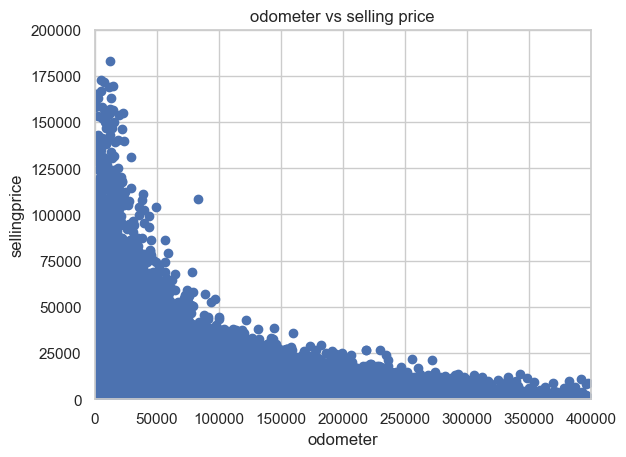

In [70]:
#Generate a scatter plot of odometer vs selling price
plt.scatter(car_value_no_null_df["odometer"],car_value_no_null_df["sellingprice"])
plt.xlabel("odometer")
plt.ylabel("sellingprice")
plt.ylim(0,200000)
plt.xlim(0,400000)
plt.title("odometer vs selling price")


-0.582415318112417


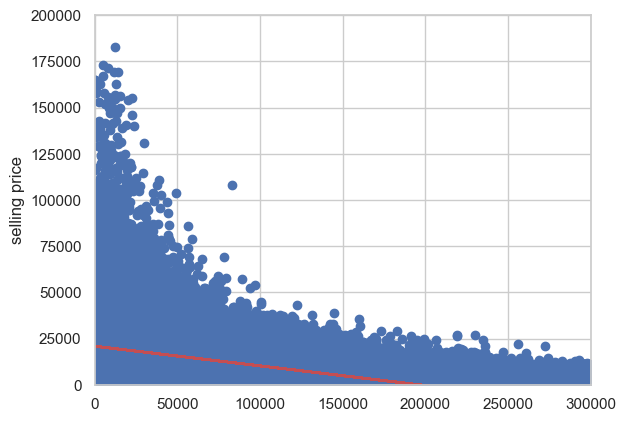

In [74]:
#scatter plot of odometer vs selling price in terms of all makes
x_values=clean_df['odometer']
y_values=clean_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.ylim(0,200000)
plt.xlim(0,300000)

plt.plot(x_values,regress_values,"r-")
print(rvalue)

-0.5840474835640612


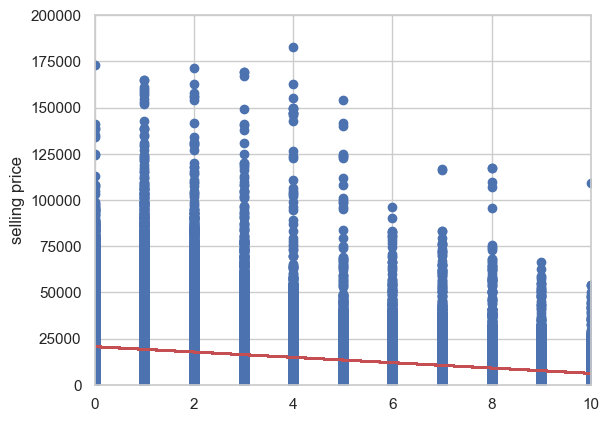

In [75]:
#scatter plot of age_when_sold vs selling price in terms of all makes

x_values=clean_df['age_when_sold']
y_values=clean_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.ylim(0,200000)
plt.xlim(0,10)

plt.plot(x_values,regress_values,"r-")
print(rvalue)

-0.7495986854129921


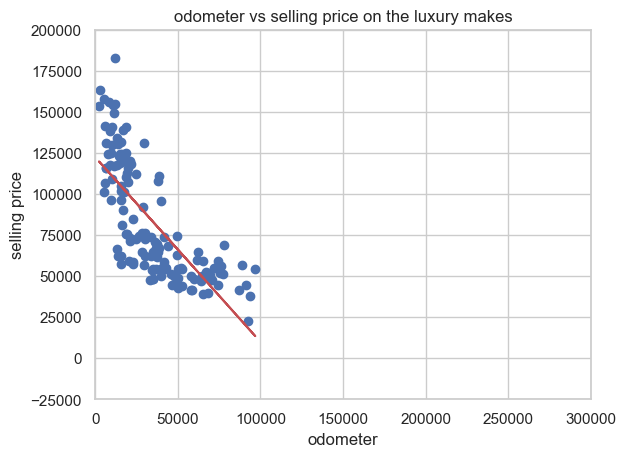

In [77]:
#scatter plot of odometer vs selling price in terms of luxury make
luxury_make=['ferrari', 'lamborghini', 'bentley']
luxury_df=clean_df.loc[(clean_df['odometer']<300000) & (clean_df['make'].isin(luxury_make))]

x_values=luxury_df['odometer']
y_values=luxury_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.xlabel("odometer")
plt.title("odometer vs selling price on the luxury makes")
plt.ylim(-25000,200000)
plt.xlim(0,300000)

plt.plot(x_values,regress_values,"r-")
plt.savefig('odometer_price_on_luxury.png',bbox_inches='tight')

print(rvalue)

-0.5887800962905723


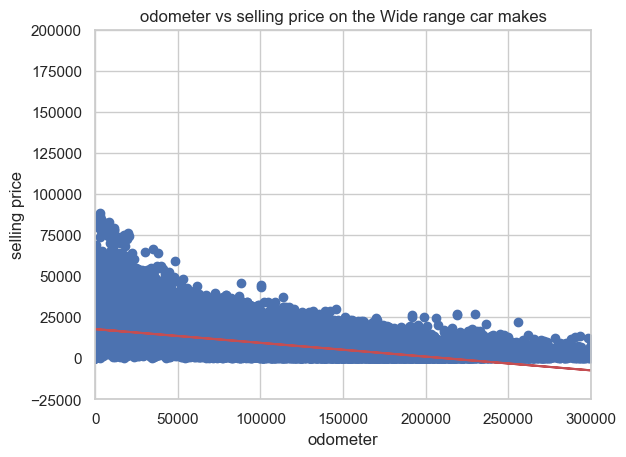

In [78]:
#scatter plot of odometer vs selling price in terms of Wide range car make
wide_range_make=["chevrolet","nissan","toyota"]
wide_range_df=clean_df.loc[(clean_df['odometer']<300000) & (clean_df['make'].isin(wide_range_make))]

x_values=wide_range_df['odometer']
y_values=wide_range_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.xlabel("odometer")
plt.title("odometer vs selling price on the Wide range car makes")
plt.ylim(-25000,200000)
plt.xlim(0,300000)

plt.plot(x_values,regress_values,"r-")
plt.savefig('odometer_price_on_Wide_range.png',bbox_inches='tight')

print(rvalue)

-0.7486590450864908


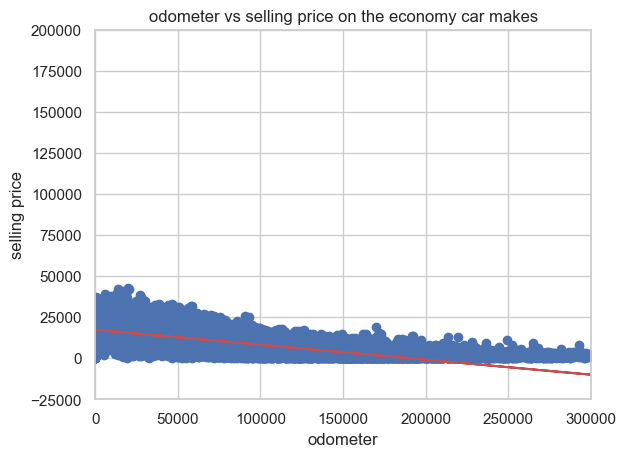

In [79]:
#scatter plot of odometer vs selling price in terms of economy car make
economy_make=["volkswagen","honda","chrysler"]
economy_df=clean_df.loc[(clean_df['odometer']<300000) & (clean_df['make'].isin(economy_make))]


x_values=economy_df['odometer']
y_values=economy_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.xlabel("odometer")
plt.title("odometer vs selling price on the economy car makes")
plt.ylim(-25000,200000)
plt.xlim(0,300000)

plt.plot(x_values,regress_values,"r-")
plt.savefig('odometer_price_on_economy.png',bbox_inches='tight')

print(rvalue)

-0.8603436462084547


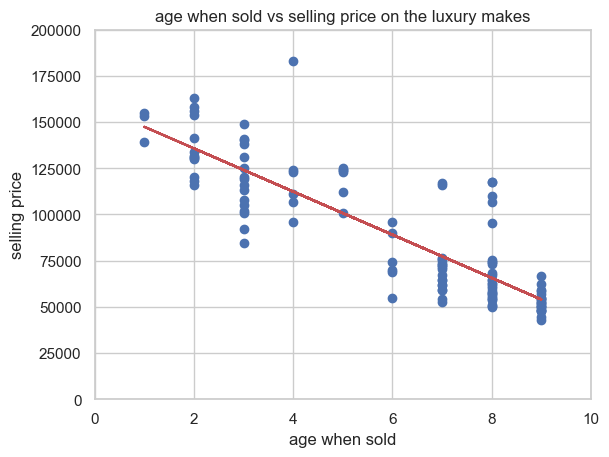

In [81]:
#scatter plot of age when sold vs selling price in terms of luxury make

luxury_make=['ferrari', 'lamborghini', 'bentley']
luxury_df=clean_df.loc[(clean_df['age_when_sold']<10) & (clean_df['make'].isin(luxury_make))]

x_values=luxury_df['age_when_sold']
y_values=luxury_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.xlabel("age when sold")
plt.title("age when sold vs selling price on the luxury makes")

plt.ylim(0,200000)
plt.xlim(0,10)

plt.plot(x_values,regress_values,"r-")
print(rvalue)
#plt.savefig('age_price_on_luxury.png',bbox_inches='tight')

-0.4712130588334285


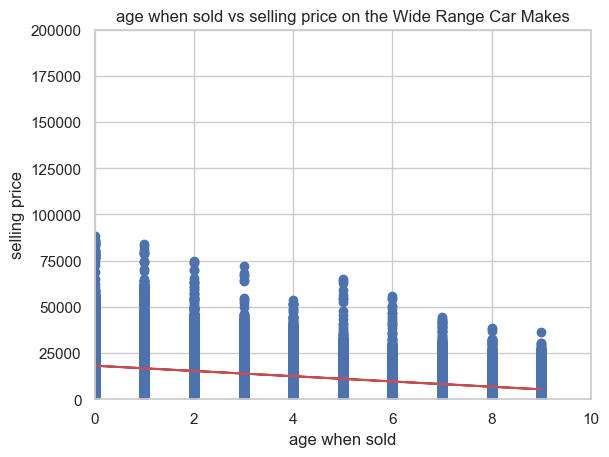

In [82]:
#scatter plot of age when sold vs selling price in terms of Wide Range Car Makes
wide_range_make=["chevrolet","nissan","toyota"]
wide_range_df=clean_df.loc[(clean_df['age_when_sold']<10) & (clean_df['make'].isin(wide_range_make))]

x_values=wide_range_df['age_when_sold']
y_values=wide_range_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.xlabel("age when sold")
plt.title("age when sold vs selling price on the Wide Range Car Makes")

plt.ylim(0,200000)
plt.xlim(0,10)

plt.plot(x_values,regress_values,"r-")

plt.savefig('age_price_on_Wide_Range.png',bbox_inches='tight')

print(rvalue)


-0.7031965922177243


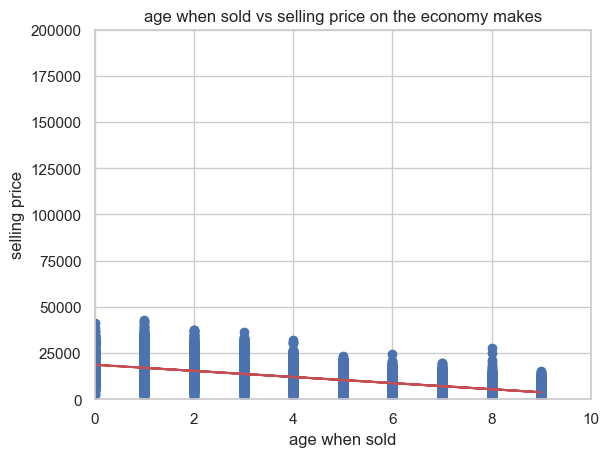

In [83]:
#scatter plot of age when sold vs selling price in terms of economy make

economy_make=["volkswagen","honda","chrysler"]
economy_df=clean_df.loc[(clean_df['age_when_sold']<10) & (clean_df['make'].isin(economy_make))]

x_values=economy_df['age_when_sold']
y_values=economy_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.xlabel("age when sold")
plt.title("age when sold vs selling price on the economy makes")

plt.ylim(0,200000)
plt.xlim(0,10)

plt.plot(x_values,regress_values,"r-")
plt.savefig('age_price_on_economy.png',bbox_inches='tight')

print(rvalue)

In [57]:
from IPython.display import Javascript

# Define JavaScript code to create a pop-up alert
js_code = """
alert("Notebook has completed running!");
"""

# Execute the JavaScript code to create the pop-up
Javascript(js_code)

<IPython.core.display.Javascript object>